Basic Python in Colab

In [1]:
print("Hello World!")

Hello World!


In [2]:
x = 5 + 3
print(x)

8


Installing Tensorflow in Colab

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf

scaler_tensor = tf.constant(5)
print(scaler_tensor)

tf.Tensor(5, shape=(), dtype=int32)


In [5]:
vector_tensor = tf.constant(1, 2, 3)
print(vector_tensor)

tf.Tensor([1. 1. 1.], shape=(3,), dtype=float64)


In [6]:
matrix_tensor = tf.constant([[1, 2], [3, 4]])
print(matrix_tensor)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


Tensor Operations

In [7]:
tensor1 = tf.constant([[1, 2], [3, 4]])
tensor2 = tf.constant([[5, 6], [7, 8]])

In [8]:
addition_result = tf.add(tensor1, tensor2)
print(addition_result)

tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)


In [9]:
import tensorflow as tf

w = tf.Variable(2.0)
b = tf.Variable(1.0)


def linear_model(x):
    return w * x + b


def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))


x_data = tf.constant([1.0, 2.0, 3.0, 4.0])
y_data = tf.constant([2.0, 4.0, 6.0, 8.0])

learning_rate = 0.1

with tf.GradientTape() as tape:
    predictions = linear_model(x_data)
    current_loss = loss(predictions, y_data)

gradients = tape.gradient(current_loss, [w, b])

w.assign_sub(learning_rate * gradients[0])
b.assign_sub(learning_rate * gradients[1])

print(w.numpy(), b.numpy())

1.5 0.8


Visualizing the result

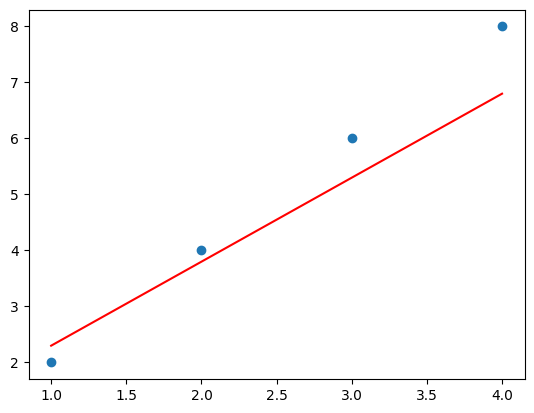

In [10]:
import matplotlib.pyplot as plt

final_predictions = linear_model(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, final_predictions, color='red')
plt.show()

Building a simple neural network

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
import numpy as np

x_data = np.array(x_data)
y_data = np.array(y_data)

model.compile(optimizer='adam', loss='mse')
model.fit(x_data, y_data, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - loss: 21.9527
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 21.7983
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 21.6444
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.4911
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.3382
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 21.1859
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.0340
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 20.8826
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.7317
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 20.5812
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 20.4312
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 20.2816
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.1324
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 19.9836
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.8353
Epo

Mounting Google Drive

In [15]:
from google.colab import drive

drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

ModuleNotFoundError: No module named 'google.colab'

In [31]:
image_path = '/content/drive/My Drive/IJSE-ML/dog.jpg'

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3321 - loss: 2.2936 - val_accuracy: 0.4779 - val_loss: 1.4269
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5325 - loss: 1.3283 - val_accuracy: 0.5630 - val_loss: 1.2495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.5942 - loss: 1.1536 - val_accuracy: 0.5866 - val_loss: 1.2205
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.6343 - loss: 1.0566 - val_accuracy: 0.6041 - val_loss: 1.1649
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6717 - loss: 0.9468 - val_accuracy: 0.6477 - val_loss: 1.0468
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.6918 - loss: 0.8878 - val_accuracy: 0.6551 - val_loss: 1.0311
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.7104 - loss: 0.8328 - val_accuracy: 0.6439 - val_loss: 1.0987
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7308 -

In [34]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6648 - loss: 1.0491
Test Loss: 1.0667082071304321, Test Accuracy: 0.656499981880188


In [35]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array


img_path = '/content/drive/My Drive/IJSE-ML/dog2.jpg'
img_array = preprocess_image(img_path)
predictions = model.predict(img_array)
print(f'Predicted class: {np.argmax(predictions[0])}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted class: 6


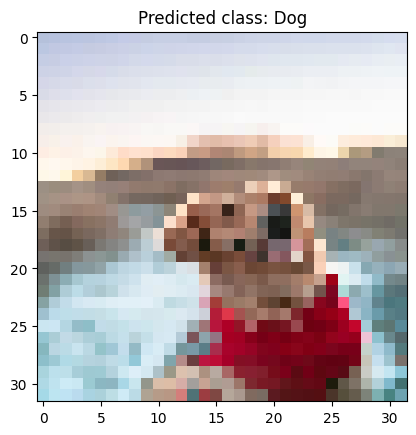

In [56]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]

# Display the image and prediction
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()

Q1 Create animal clasification using animals10 dataset

Step 1: Import Google Drive and KaggleHub to Download the Dataset

In [58]:
from google.colab import drive

drive.mount('/content/drive')

import kagglehub

# Download the latest version of the animals10 dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


Step 2: Import Required Libraries

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

Step 3: Load and Preprocess CIFAR-10 Dataset

In [60]:
# Load CIFAR-10 dataset (you should use animals10 instead)
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

Step 4: Build the CNN Model

In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Step 5: Compile the Model

In [62]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Step 6: Train the Model

In [63]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.3513 - loss: 1.7558 - val_accuracy: 0.5612 - val_loss: 1.2369
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 46ms/step - accuracy: 0.5799 - loss: 1.1805 - val_accuracy: 0.6231 - val_loss: 1.0635
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6545 - loss: 0.9924 - val_accuracy: 0.6482 - val_loss: 1.0019
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6848 - loss: 0.8898 - val_accuracy: 0.6817 - val_loss: 0.9168
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7131 - loss: 0.8219 - val_accuracy: 0.6780 - val_loss: 0.9417
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7345 - loss: 0.7569 - val_accuracy: 0.6992 - val_loss: 0.8944
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7531 - loss: 0.7035 - val_accuracy: 0.7064 - val_loss: 0.8576
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7697 -

Step 7: Evaluate the Model

In [64]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7148 - loss: 0.8430
Test Loss: 0.8478599786758423, Test Accuracy: 0.7121999859809875


Step 8: Image Preprocessing Function

In [65]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

Step 9: Make Predictions on a New Image

In [72]:
img_path = '/content/drive/My Drive/IJSE-ML/dog2.jpg'
img_array = preprocess_image(img_path)
predictions = model.predict(img_array)
print(f'Predicted class: {np.argmax(predictions[0])}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: 5


Step 10: Define Class Names and Display the Image and Prediction

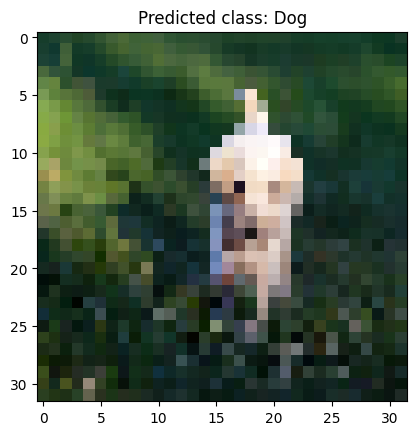

In [73]:
# Class names for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get the predicted class name
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]

# Display the image and prediction
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()